# 04 Construcción árbol de decisión multiclase con scikit learn
Ahora de manera automática, utilizando la librería [scikit learn](https://scikit-learn.org/stable/), la libería básica de referencia para machine learning.


[https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Importamos las funciones de árboles de scikit learn
from sklearn import tree

## 0103 Carga del dataset: Salud del Feto
Para probar a hacer árboles de decisión de clasificación multiclase utilizaremos un dataset sobre el estado de salud de un feto que he encontrado en Kaggle ([aquí](https://www.kaggle.com/andrewmvd/fetal-health-classification)).

Podéis encontrar el archivo listo para importar en github: https://raw.githubusercontent.com/abelmmg/TheValley_AI/main/fetal_health.csv

Importa este dataset en un dataframe llamado **df**.

Descripción de las columnas:
* baseline value: Baseline Fetal Heart Rate (FHR)
* accelerations: Number of accelerations per second
* fetal_movement: Number of fetal movements per second
* uterine_contractions: Number of uterine contractions per second
* light_decelerations: Number of LDs per second
* severe_decelerations: Number of SDs per second
* prolongued_decelerations: Number of PDs per second
* abnormal_short_term_variability: Percentage of time with abnormal short term variability
* mean_value_of_short_term_variability: Mean value of short term variability
* percentage_of_time_with_abnormal_long_term_variability: Percentage of time with abnormal long term variability


**Descripción de la clase**:
* 1 = Normal
* 2 = Suspect
* 3 = Pathological

In [ ]:
# Url archivo raw
url ="https://raw.githubusercontent.com/abelmmg/TheValley_AI/main/fetal_health.csv"
# Importa csv
df = pd.read_csv(url)
# Visualización primeras filas
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [ ]:
df.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


## 0402 Inicializamos el árbol
Definiendo las características que tendrá.

In [ ]:
df_resumen = df[["baseline value", "accelerations", "fetal_movement", "fetal_health"]]
df_resumen.columns = ["Base", "Acc", "Mov", "Salud Feto"]
df_resumen.head(7)

,Base,Acc,Mov,Salud Feto
0,120.0,0.000,0.0,2.0
1,132.0,0.006,0.0,1.0
2,133.0,0.003,0.0,1.0
3,134.0,0.003,0.0,1.0
4,132.0,0.007,0.0,1.0
5,134.0,0.001,0.0,3.0
6,134.0,0.001,0.0,3.0


In [ ]:
# Inicializamos un árbol. Por ahora está vacío.
# Solo definimos cómo queremos que sea en cuanto a su estructura y condiciones de entrenamiento
arbol = tree.DecisionTreeClassifier(max_depth=3)
arbol

DecisionTreeClassifier(max_depth=3)

## 0403 Entrenamos el modelo
Una vez inicializado y definido el árbol, el método .[fit()](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.fit) realiza el proceso de particionado recursivo que hemos hecho nosotros antes a mano.

In [ ]:
# Entrenamos el árbol inicializado a partir de los datos que le pasemos con .fit()

X = df_resumen[["Base", "Acc", "Mov"]]
y = df_resumen[["Salud Feto"]]

arbol = arbol.fit(X, y)

#arbol = arbol.fit(
#    X=df_resumen[["Base", "Acc", "Mov"]],  # vars descriptivas
#    y=df_resumen[["Salud Feto"]],          # var objetivo
#    )
arbol

DecisionTreeClassifier(max_depth=3)

##0404 Visualizamos el modelo
Una vez entrenado el modelo, podemos visualizarlo.

In [ ]:
# Con el método export_text en un print()
esquema_print = tree.export_text(arbol, feature_names=["Base", "Acc", "Mov"])
print(esquema_print)

|--- Acc <= 0.00
|   |--- Base <= 136.50
|   |   |--- Mov <= 0.22
|   |   |   |--- class: 1.0
|   |   |--- Mov >  0.22
|   |   |   |--- class: 3.0
|   |--- Base >  136.50
|   |   |--- Base <= 143.50
|   |   |   |--- class: 1.0
|   |   |--- Base >  143.50
|   |   |   |--- class: 2.0
|--- Acc >  0.00
|   |--- Acc <= 0.00
|   |   |--- Base <= 136.50
|   |   |   |--- class: 1.0
|   |   |--- Base >  136.50
|   |   |   |--- class: 1.0
|   |--- Acc >  0.00
|   |   |--- Base <= 111.00
|   |   |   |--- class: 1.0
|   |   |--- Base >  111.00
|   |   |   |--- class: 1.0



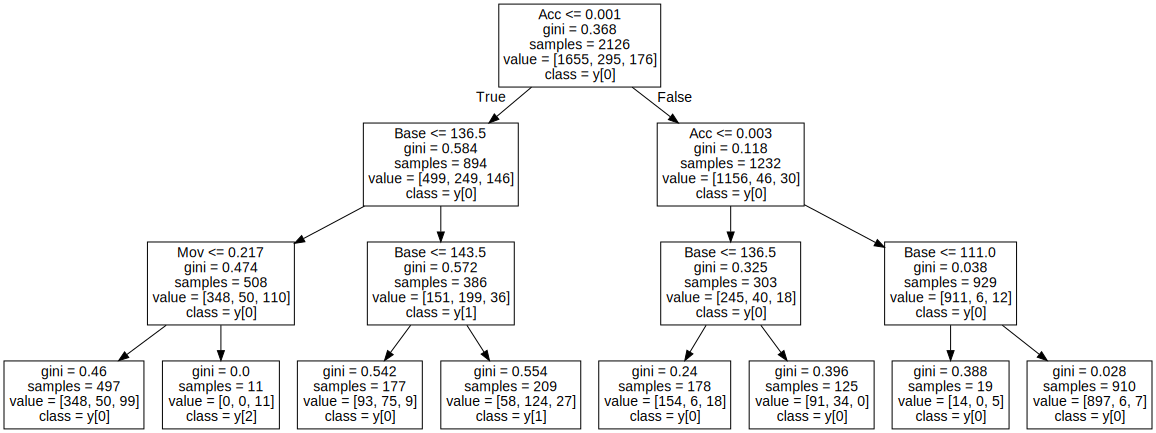

In [ ]:
# O con la librería graphviz
import graphviz

# Export_graphviz
dot_data = tree.export_graphviz(
    arbol, out_file=None, feature_names=["Base", "Acc", "Mov"], class_names=True
)
graph = graphviz.Source(dot_data)
graph

## 0405 Realizamos una predicción
Una vez el modelo está entrenado (definido) podemos pasarle datos para obtener las prediciones correspondientes de la variable objetivo.

Para esto utilizamos el método .[predict()](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.predict).

In [ ]:
# Predicción
prediccion = arbol.predict(df_resumen[["Base", "Acc", "Mov"]])
prediccion

array([1., 1., 1., ..., 1., 1., 1.])

In [ ]:
# Visualizar los valores únicos y sus totales para la predicción realizada.
unique_values, counts = np.unique(prediccion, return_counts=True)

# Mostrar los valores únicos
print("Valores únicos:", unique_values)
# Mostrar el total de valores únicos
print("Total de valores únicos:", len(unique_values))
# Mostrar las cuentas de cada valor único
print("Cuentas de cada valor único:", counts)

# Question:
# ¿ Cuadran estos numeros con los que salen en el árbol graphviz ?

Valores únicos: [1. 2. 3.]
Total de valores únicos: 3
Cuentas de cada valor único: [1906  209   11]


In [ ]:
# Cómo de buena es la predicción?
from sklearn.metrics import accuracy_score

accuracy_score(df_resumen["Salud Feto"], prediccion)

0.8146754468485419

# EJERCICIO con todas las características
Entrena un árbol de decisión con todas las variables del set de datos de salud del feto, y evalua si la predicción es mejor o peor que utilizando tres variables (que es lo que acabamos de hacer en la sección anterior).

Hazlo primero manteniendo una profundidad de 3 como en el ejemplo anterior y luego prueba también con 5 y 20.

In [ ]:
# TODO ...